In [25]:
import pandas as pd
import numpy as np
import pygal

In [16]:
def fetch_ownership(project_name):
    dataset = pd.read_csv('./drilled-informations/' + project_name + '-ownership.csv', sep = ';')
    dataset['FILE_OWNERSHIP'] = dataset['AUTHOR_LINES'] / dataset['FILE_LINES']
    
    # TODO Filter the non-algorithm files.
    
    return dataset

scikit_learn = fetch_ownership('scikit-learn')
scikit_image = fetch_ownership('scikit-image')
nltk = fetch_ownership('nltk')

nltk.sample()

,FILE_NAME,FILE_LINES,AUTHOR_NAME,AUTHOR_LINES,FILE_OWNERSHIP
932,./nltk/translate/ibm1.py,250,hoontw,213,0.852


## La majorité des algorithmes sont maintenus par un contributeur majeur.

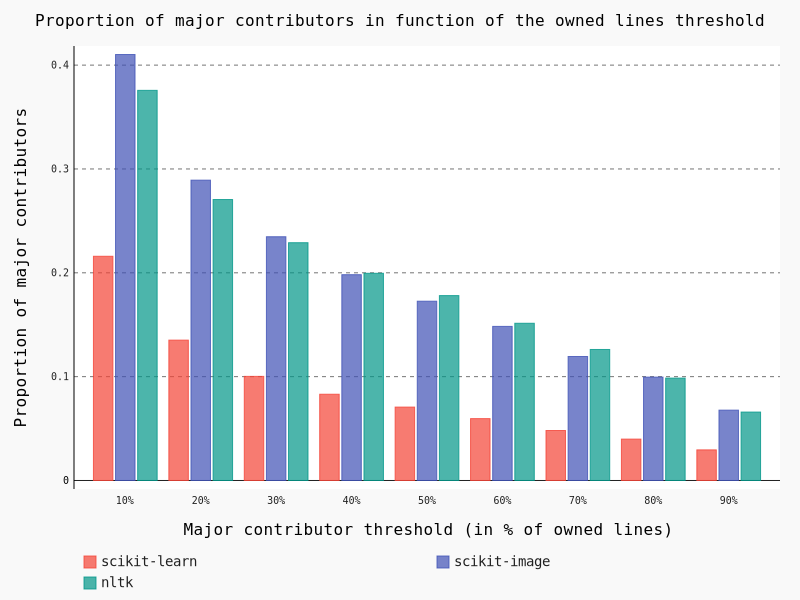

In [14]:
chart = pygal.Bar(legend_at_bottom = True)

chart.title = 'Proportion of major contributors in function of the owned lines threshold'
chart.x_title = 'Major contributor threshold (in % of owned lines)'
chart.y_title = 'Proportion of major contributors'

chart.x_labels = [str(i * 10) + '%' for i in range(1, 10)]

chart.add('scikit-learn', [len(scikit_learn[scikit_learn['FILE_OWNERSHIP'] >= i / 10]) / len(scikit_learn) for i in range(1, 10)])
chart.add('scikit-image', [len(scikit_image[scikit_image['FILE_OWNERSHIP'] >= i / 10]) / len(scikit_image) for i in range(1, 10)])
chart.add('nltk', [len(nltk[nltk['FILE_OWNERSHIP'] >= i / 10]) / len(nltk) for i in range(1, 10)])

## Un contributeur majeur d'un algorithme n'est contributeur majeur que de cet algorithme

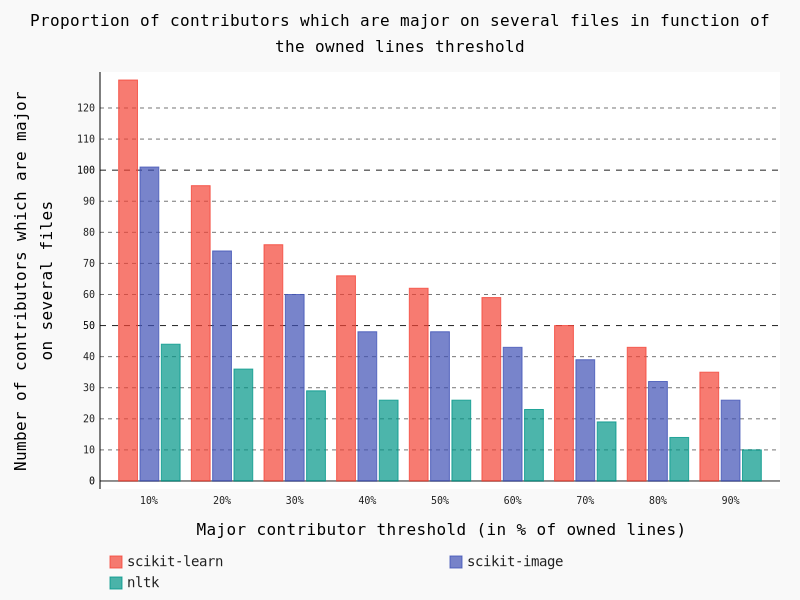

In [69]:
def major_owner_on_several_files(dataset, threshold):
    major = dataset[dataset['FILE_OWNERSHIP'] >= threshold]['AUTHOR_NAME']
    
    owned = pd.Series(major.value_counts().values)
    
    return len(owned[owned != 1])

chart = pygal.Bar(legend_at_bottom = True)

chart.title = 'Proportion of contributors which are major on several files in function of the owned lines threshold'
chart.x_title = 'Major contributor threshold (in % of owned lines)'
chart.y_title = 'Number of contributors which are major on several files'

chart.x_labels = [str(i * 10) + '%' for i in range(1, 10)]

chart.add('scikit-learn', [major_owner_on_several_files(scikit_learn, i / 10) for i in range(1, 10)])
chart.add('scikit-image', [major_owner_on_several_files(scikit_image, i / 10) for i in range(1, 10)])
chart.add('nltk', [major_owner_on_several_files(nltk, i / 10) for i in range(1, 10)])